# CHURN PREDICTION ITALIAN MUSEUM 

### In recent years, cultural institutions such as museums have increasingly relied on subscription-based models to build long-term relationships with their visitors. Understanding subscriber behavior and anticipating cancellations (churn) has therefore become a key challenge in improving customer retention and ensuring sustainable revenue.

### This project focuses on a database of subscribers from Italian museums, with the objective of analyzing user behavior, identifying the main factors that contribute to churn, and predicting future churners. By exploring demographic information, visit patterns, and subscription characteristics, we aim to gain actionable insights into how different segments of subscribers interact with the museums and why some of them decide to cancel their subscription.

### The project is structured in two main phases. First, an exploratory data analysis (EDA) is conducted to better understand the data, uncover trends, and highlight differences between churned and retained subscribers. In the second phase, machine learning models are developed and evaluated in order to predict churn and identify high-risk profiles. These predictions can help museums design targeted retention strategies, such as personalized offers or engagement campaigns, to reduce churn and improve subscriber loyalty.

### Overall, this work demonstrates how data-driven approaches can support decision-making in the cultural sector by transforming raw subscription data into meaningful insights and predictive tools.

## Import data & package 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import pandas as pd 
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')


In [2]:
base_dir = Path(r"C:\Users\Hp\Desktop\Churn Prediction Data")

data = pd.read_csv(base_dir / "data11.csv")
an   = pd.read_csv(base_dir / "an13.csv", encoding="latin1")
in1  = pd.read_csv(base_dir / "in13.csv")


In [5]:
print(data.shape)
print(an.shape)
print(in1.shape)

(80140, 6)
(87052, 15)
(545085, 8)


## PreProcessing 


In [7]:
data.head()

,Unnamed: 0,codcliente,si2014,ultimo_ing.x,abb13,abb14
0,1,100005,0,2013-09-19,2013-01-27,NaN
1,2,100006,1,2013-11-21,2013-01-14,2014-01-09
2,3,100007,0,NaN,2012-12-05,NaN
3,4,100017,1,2013-10-19,2012-12-10,2013-12-01
4,5,100020,0,2013-08-11,2012-12-09,NaN


In [9]:
#Pre-processing
data = data.drop(data.columns[0], axis =1)
data =data.rename(columns={"codcliente": "id","si2014":'Churn',
                     'ultimo_ing.x':'Last Date of visit',
                     'abb13':'Date of begining Card 2013','abb14': 'Date of renew Card'})


In [11]:
data.head()

,id,Churn,Last Date of visit,Date of begining Card 2013,Date of renew Card
0,100005,0,2013-09-19,2013-01-27,NaN
1,100006,1,2013-11-21,2013-01-14,2014-01-09
2,100007,0,NaN,2012-12-05,NaN
3,100017,1,2013-10-19,2012-12-10,2013-12-01
4,100020,0,2013-08-11,2012-12-09,NaN


In [13]:
an.head()

,Unnamed: 0,codcliente,data_inizio,importo,sconto,riduzione,tipo_pag,agenzia,agenzia_tipo,sesso,data_nascita,professione,comune,cap,nuovo_abb
0,1,90095,09/12/2012 00:00,28,NESSUNO SCONTO,ABBONAMENTO RIDOTTO SCONTATO,CONTANTI,INFOPIEMONTE TORINO CULTURA,PUNTO INFORMATIVO,M,1985,NaN,TORINO,10100,NUOVO ABBONATO
1,2,89662,06/01/2013 00:00,28,NESSUNO SCONTO,ABBONAMENTO RIDOTTO SCONTATO,CONTANTI,INFOPIEMONTE TORINO CULTURA,PUNTO INFORMATIVO,M,1985,NaN,TORINO,10129,NUOVO ABBONATO
2,3,202278,27/01/2013 00:00,28,NESSUNO SCONTO,ABBONAMENTO RIDOTTO SCONTATO,BANCOMAT,INFOPIEMONTE TORINO CULTURA,PUNTO INFORMATIVO,M,1992,NaN,TORINO,10137,NUOVO ABBONATO
3,4,269895,02/12/2012 00:00,28,NESSUNO SCONTO,ABBONAMENTO RIDOTTO SCONTATO,CONTANTI,LIBRERIA MONDADORI,PUNTO COMMERCIALE,M,1986,NaN,SVIZZERA,10036,NUOVO ABBONATO
4,5,88177,26/01/2013 00:00,28,NESSUNO SCONTO,ABBONAMENTO RIDOTTO SCONTATO,CONTANTI,INFOPIEMONTE TORINO CULTURA,PUNTO INFORMATIVO,M,1983,NaN,TORINO,10149,NUOVO ABBONATO


In [17]:
an.head()

,id,Date of begining,price paid,type of discount,type of price reduction,mode of payment,name of the organisation,place where consumer bought the card,Sex,Birth Date,Profesion,comune,code postal,Existance of Card 2012
0,90095,09/12/2012 00:00,28,NESSUNO SCONTO,ABBONAMENTO RIDOTTO SCONTATO,CONTANTI,INFOPIEMONTE TORINO CULTURA,PUNTO INFORMATIVO,M,1985,NaN,TORINO,10100,NUOVO ABBONATO
1,89662,06/01/2013 00:00,28,NESSUNO SCONTO,ABBONAMENTO RIDOTTO SCONTATO,CONTANTI,INFOPIEMONTE TORINO CULTURA,PUNTO INFORMATIVO,M,1985,NaN,TORINO,10129,NUOVO ABBONATO
2,202278,27/01/2013 00:00,28,NESSUNO SCONTO,ABBONAMENTO RIDOTTO SCONTATO,BANCOMAT,INFOPIEMONTE TORINO CULTURA,PUNTO INFORMATIVO,M,1992,NaN,TORINO,10137,NUOVO ABBONATO
3,269895,02/12/2012 00:00,28,NESSUNO SCONTO,ABBONAMENTO RIDOTTO SCONTATO,CONTANTI,LIBRERIA MONDADORI,PUNTO COMMERCIALE,M,1986,NaN,SVIZZERA,10036,NUOVO ABBONATO
4,88177,26/01/2013 00:00,28,NESSUNO SCONTO,ABBONAMENTO RIDOTTO SCONTATO,CONTANTI,INFOPIEMONTE TORINO CULTURA,PUNTO INFORMATIVO,M,1983,NaN,TORINO,10149,NUOVO ABBONATO


In [15]:
an = an.drop(an.columns[0], axis =1)
an= an.rename(columns = {'codcliente': 'id','data_inizio': 'Date of begining','importo': 'price paid',
                     'sconto': 'type of discount',
                     'riduzione': 'type of price reduction',
                     'tipo_pag': 'mode of payment',
                     'agenzia': "name of the organisation",
                     'agenzia_tipo': 'place where consumer bought the card','sesso':'Sex','data_nascita': 'Birth Date',
                     'professione': "Profesion",'cap' : 'code postal','nuovo_abb':'Existance of Card 2012'
                     })

In [21]:
in1.head()

,Unnamed: 0,datai,orai,importo,museo,prov_museo,com_museo,CodCliente
0,1,01/12/2012,10:10,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715
1,2,01/12/2012,10:11,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,46715
2,3,01/12/2012,10:11,7.5,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015
3,4,01/12/2012,10:12,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,133015
4,5,01/12/2012,10:18,2.5,MUSEO DELLA FRUTTA,TO,TORINO,80732


In [19]:
in1 = in1.rename(columns={"Unnamed: 0" :'Index',"CodCliente": "id",'datai': 'date of visit','orai':"hour of visit",
                   'importo': 'price of ticket not paid','museo': 'name of museum','prov_museo':'province of museum',
                    'com_museo': 'city of museum'}).drop('Index',axis=1)
in1=in1.sort_values(by=["id"]).reset_index().drop('index',axis=1)

In [21]:
in1.head()

,date of visit,hour of visit,price of ticket not paid,name of museum,province of museum,city of museum,id
0,02/03/2013,16:07,5.0,MUSEO NAZIONALE DELLA MONTAGNA,TO,TORINO,6
1,27/10/2013,11:31,3.6,"MOSTRA \WERNER BISCHOF RETROSPETTIVA\\ \""""",TO,TORINO (TO),6
2,12/04/2013,15:00,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,13
3,14/04/2013,15:39,4.0,"MOSTRA \ROBERT CAPA - RETROSPETTIVA\\\""""",TO,TORINO,13
4,12/04/2013,15:00,5.0,REGGIA DI VENARIA REALE,TO,VENARIA REALE,13


In [23]:
#  We take the important variables from the in3 data and create a new database containing client id and 
#  the number of visits and the sum of price not paid and to merge it in the end with our previous databases

in1['Count'] = 1
in2=in1.groupby(['id']).Count.count().reset_index()
pivot = in1.pivot_table(index =['id'], 
                       values =['price of ticket not paid'], 
                       aggfunc ='sum')
in2 = pd.merge(in2,pivot,on='id',how="left")
in2=in2.rename(columns={"Count": "Number of visits","price of ticket not paid":"Total of price not paid"})

In [25]:
in2.head()

,id,Number of visits,Total of price not paid
0,6,2,8.60
1,13,9,33.50
2,16,6,25.75
3,23,2,9.25
4,27,1,5.00


## Create Variable AGE/Dropping Index/Transform Sex and Existance of Card 2012 into binary Variable


In [27]:
an.dtypes

id                                        int64
Date of begining                         object
price paid                                int64
type of discount                         object
type of price reduction                  object
mode of payment                          object
name of the organisation                 object
place where consumer bought the card     object
Sex                                      object
Birth Date                               object
Profesion                               float64
comune                                   object
code postal                              object
Existance of Card 2012                   object
dtype: object

In [29]:
an['Birth Date'].unique()

array(['1985', '1992', '1986', '1983', '1989', '1994', '1984', '1988',
       '1990', '1987', '1993', '1996', '1991', '1982', '1995', '1946',
       '1949', '1947', '1944', '1961', '1959', '1975', '1981', '1980',
       '1978', '1969', '1977', '1939', '1962', '1942', '1960', '1943',
       '1941', '1974', '1966', '1970', '1940', '1964', '2004', '1999',
       '1955', '1973', '1979', '1968', '1951', '1972', '1933', '1936',
       '1967', '1950', '1976', '1954', '1958', '1953', '1971', '1952',
       '1938', '1948', '1929', '1945', '1963', '2000', '1957', '1932',
       '1956', '1937', '2001', '1931', '2002', '1965', '1934', '1997',
       '2003', '2006', '1930', '1998', '1926', '1935', '1928', '1916',
       '2005', '1925', '1919', '2007', '1924', '1927', '1922', '1921',
       '2011', '2012', '1923', '1915', '2028', '1-01', '1917', '1900',
       '1901', '2076', '2022', '2026', '1903', '1920', '2008', '1918',
       '2013', '2010', '9-02', '1914'], dtype=object)

## We notice invalid Birth date Like '1-01' and '9,02' and remove them

In [31]:
an.drop(an.loc[(an['Birth Date'] == '1-01') | (an['Birth Date'] == '9-02')].index,axis=0)['Birth Date'].unique()

array(['1985', '1992', '1986', '1983', '1989', '1994', '1984', '1988',
       '1990', '1987', '1993', '1996', '1991', '1982', '1995', '1946',
       '1949', '1947', '1944', '1961', '1959', '1975', '1981', '1980',
       '1978', '1969', '1977', '1939', '1962', '1942', '1960', '1943',
       '1941', '1974', '1966', '1970', '1940', '1964', '2004', '1999',
       '1955', '1973', '1979', '1968', '1951', '1972', '1933', '1936',
       '1967', '1950', '1976', '1954', '1958', '1953', '1971', '1952',
       '1938', '1948', '1929', '1945', '1963', '2000', '1957', '1932',
       '1956', '1937', '2001', '1931', '2002', '1965', '1934', '1997',
       '2003', '2006', '1930', '1998', '1926', '1935', '1928', '1916',
       '2005', '1925', '1919', '2007', '1924', '1927', '1922', '1921',
       '2011', '2012', '1923', '1915', '2028', '1917', '1900', '1901',
       '2076', '2022', '2026', '1903', '1920', '2008', '1918', '2013',
       '2010', '1914'], dtype=object)

In [33]:
# Remove invalid birth date values
invalid_birth_dates = ['1-01', '9-02']
an = an[~an['Birth Date'].isin(invalid_birth_dates)]

# Convert Birth Date to integer (year)
an['Birth Date'] = an['Birth Date'].astype(int)

# Compute age (reference year: 2014)
an['age'] = 2014 - an['Birth Date']

# Drop Birth Date column
an = an.drop(columns=['Birth Date'])


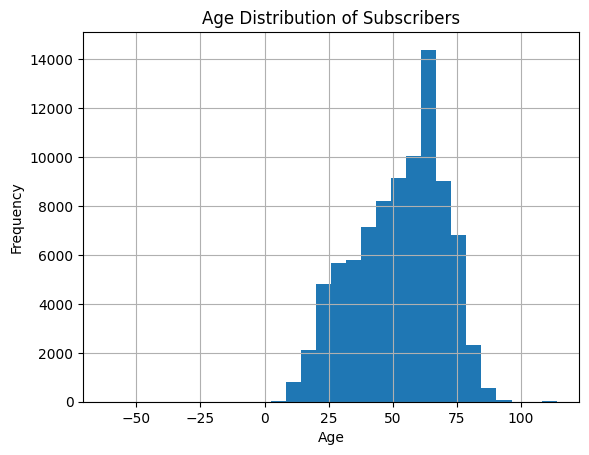

In [35]:
an['age'].hist(bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Subscribers")
plt.show()

## Subscribers with age below 0 and over 100 exist, to be dropped also

In [37]:
an=an.drop(an.loc[(an['age'] < 0)| (an['age'] > 100)].index,axis=0)

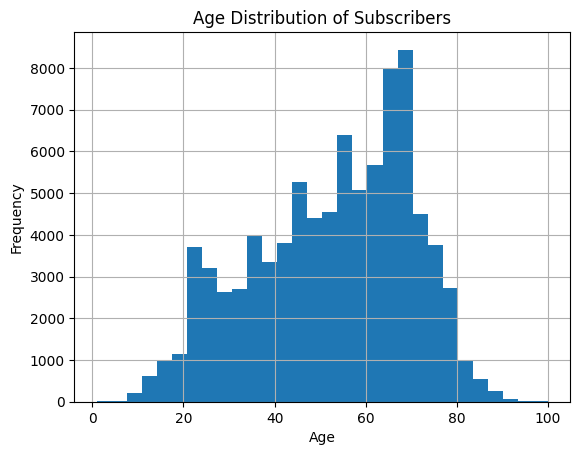

In [39]:
an['age'].hist(bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Subscribers")
plt.show()

In [41]:
## We start to merge two table : data and an 

table1 = pd.merge(data,an,on='id')

## We transform our categorical variables into numeric
table1.Sex[table1.Sex == 'M'] = 0
table1.Sex[table1.Sex== 'F'] = 1
table1['Existance of Card 2012'][table1["Existance of Card 2012"] == 'NUOVO ABBONATO'] = 1
table1['Existance of Card 2012'][table1["Existance of Card 2012"] == 'VECCHIO ABBONATO'] = 0

In [43]:
## We merge two table again  : table1(data&an) and in2

df = pd.merge(table1,in2,how="left",on='id')

#df is our final table.
#if the value given to a client is Nan, this means that he probably did not make any visits. We therefore decided to assign the value 0 to the Nan
df["Number of visits"]=df["Number of visits"].fillna(0).astype(int)


In [47]:
## Number of day since the last visit 

df["Last Date of visit"].fillna("",inplace=True)

most_recent_date = df["Last Date of visit"].max()
most_recent_date = pd.to_datetime(most_recent_date)
df["Last Date of visit"] = pd.to_datetime(df["Last Date of visit"])
df["Number of days since last visit"] = (most_recent_date - df["Last Date of visit"]).dt.days



In [49]:
#Create a group age 

bins = [0, 17, 25, 40, 63, 100]
labels = ['0-17', '18-25', '26-40', '41-63', '64+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

df.head()

,id,Churn,Last Date of visit,Date of begining Card 2013,Date of renew Card,Date of begining,price paid,type of discount,type of price reduction,mode of payment,...,Sex,Profesion,comune,code postal,Existance of Card 2012,age,Number of visits,Total of price not paid,Number of days since last visit,age_group
0,100005,0,2013-09-19,2013-01-27,NaN,27/01/2013 00:00,28,RINNOVO ABBONAMENTO,ABBONAMENTO MUSEI RIDOTTO,BANCOMAT,...,1,NaN,GRUGLIASCO,10095,1,67,2,11.00,192.0,64+
1,100006,1,2013-11-21,2013-01-14,2014-01-09,14/01/2013 00:00,44,RINNOVO ABBONAMENTO,ABBONAMENTI MUSEI TORINO,CONTANTI,...,1,NaN,TORINO,10126,1,40,23,84.60,129.0,26-40
2,100007,0,NaT,2012-12-05,NaN,05/12/2012 00:00,30,GRUPPO D'ACQUISTO,ABBONAMENTO MUSEI RIDOTTO,CONTANTI,...,0,NaN,TORINO,10151,1,44,0,NaN,NaN,41-63
3,100017,1,2013-10-19,2012-12-10,2013-12-01,10/12/2012 00:00,30,NESSUNO SCONTO,OFFERTA SU QUANTITATIVO 30,CONTANTI,...,1,NaN,TORINO,10146,1,45,1,3.75,162.0,41-63
4,100020,0,2013-08-11,2012-12-09,NaN,09/12/2012 00:00,49,NESSUNO SCONTO,ABBONAMENTI MUSEI TORINO,CARTA DI CREDITO,...,0,NaN,MILANO,20149,1,28,3,13.75,231.0,26-40


In [51]:
df.shape

(80108, 22)

## Describing the most interesting variables by plotting distributions, correlations, co-occurrence.

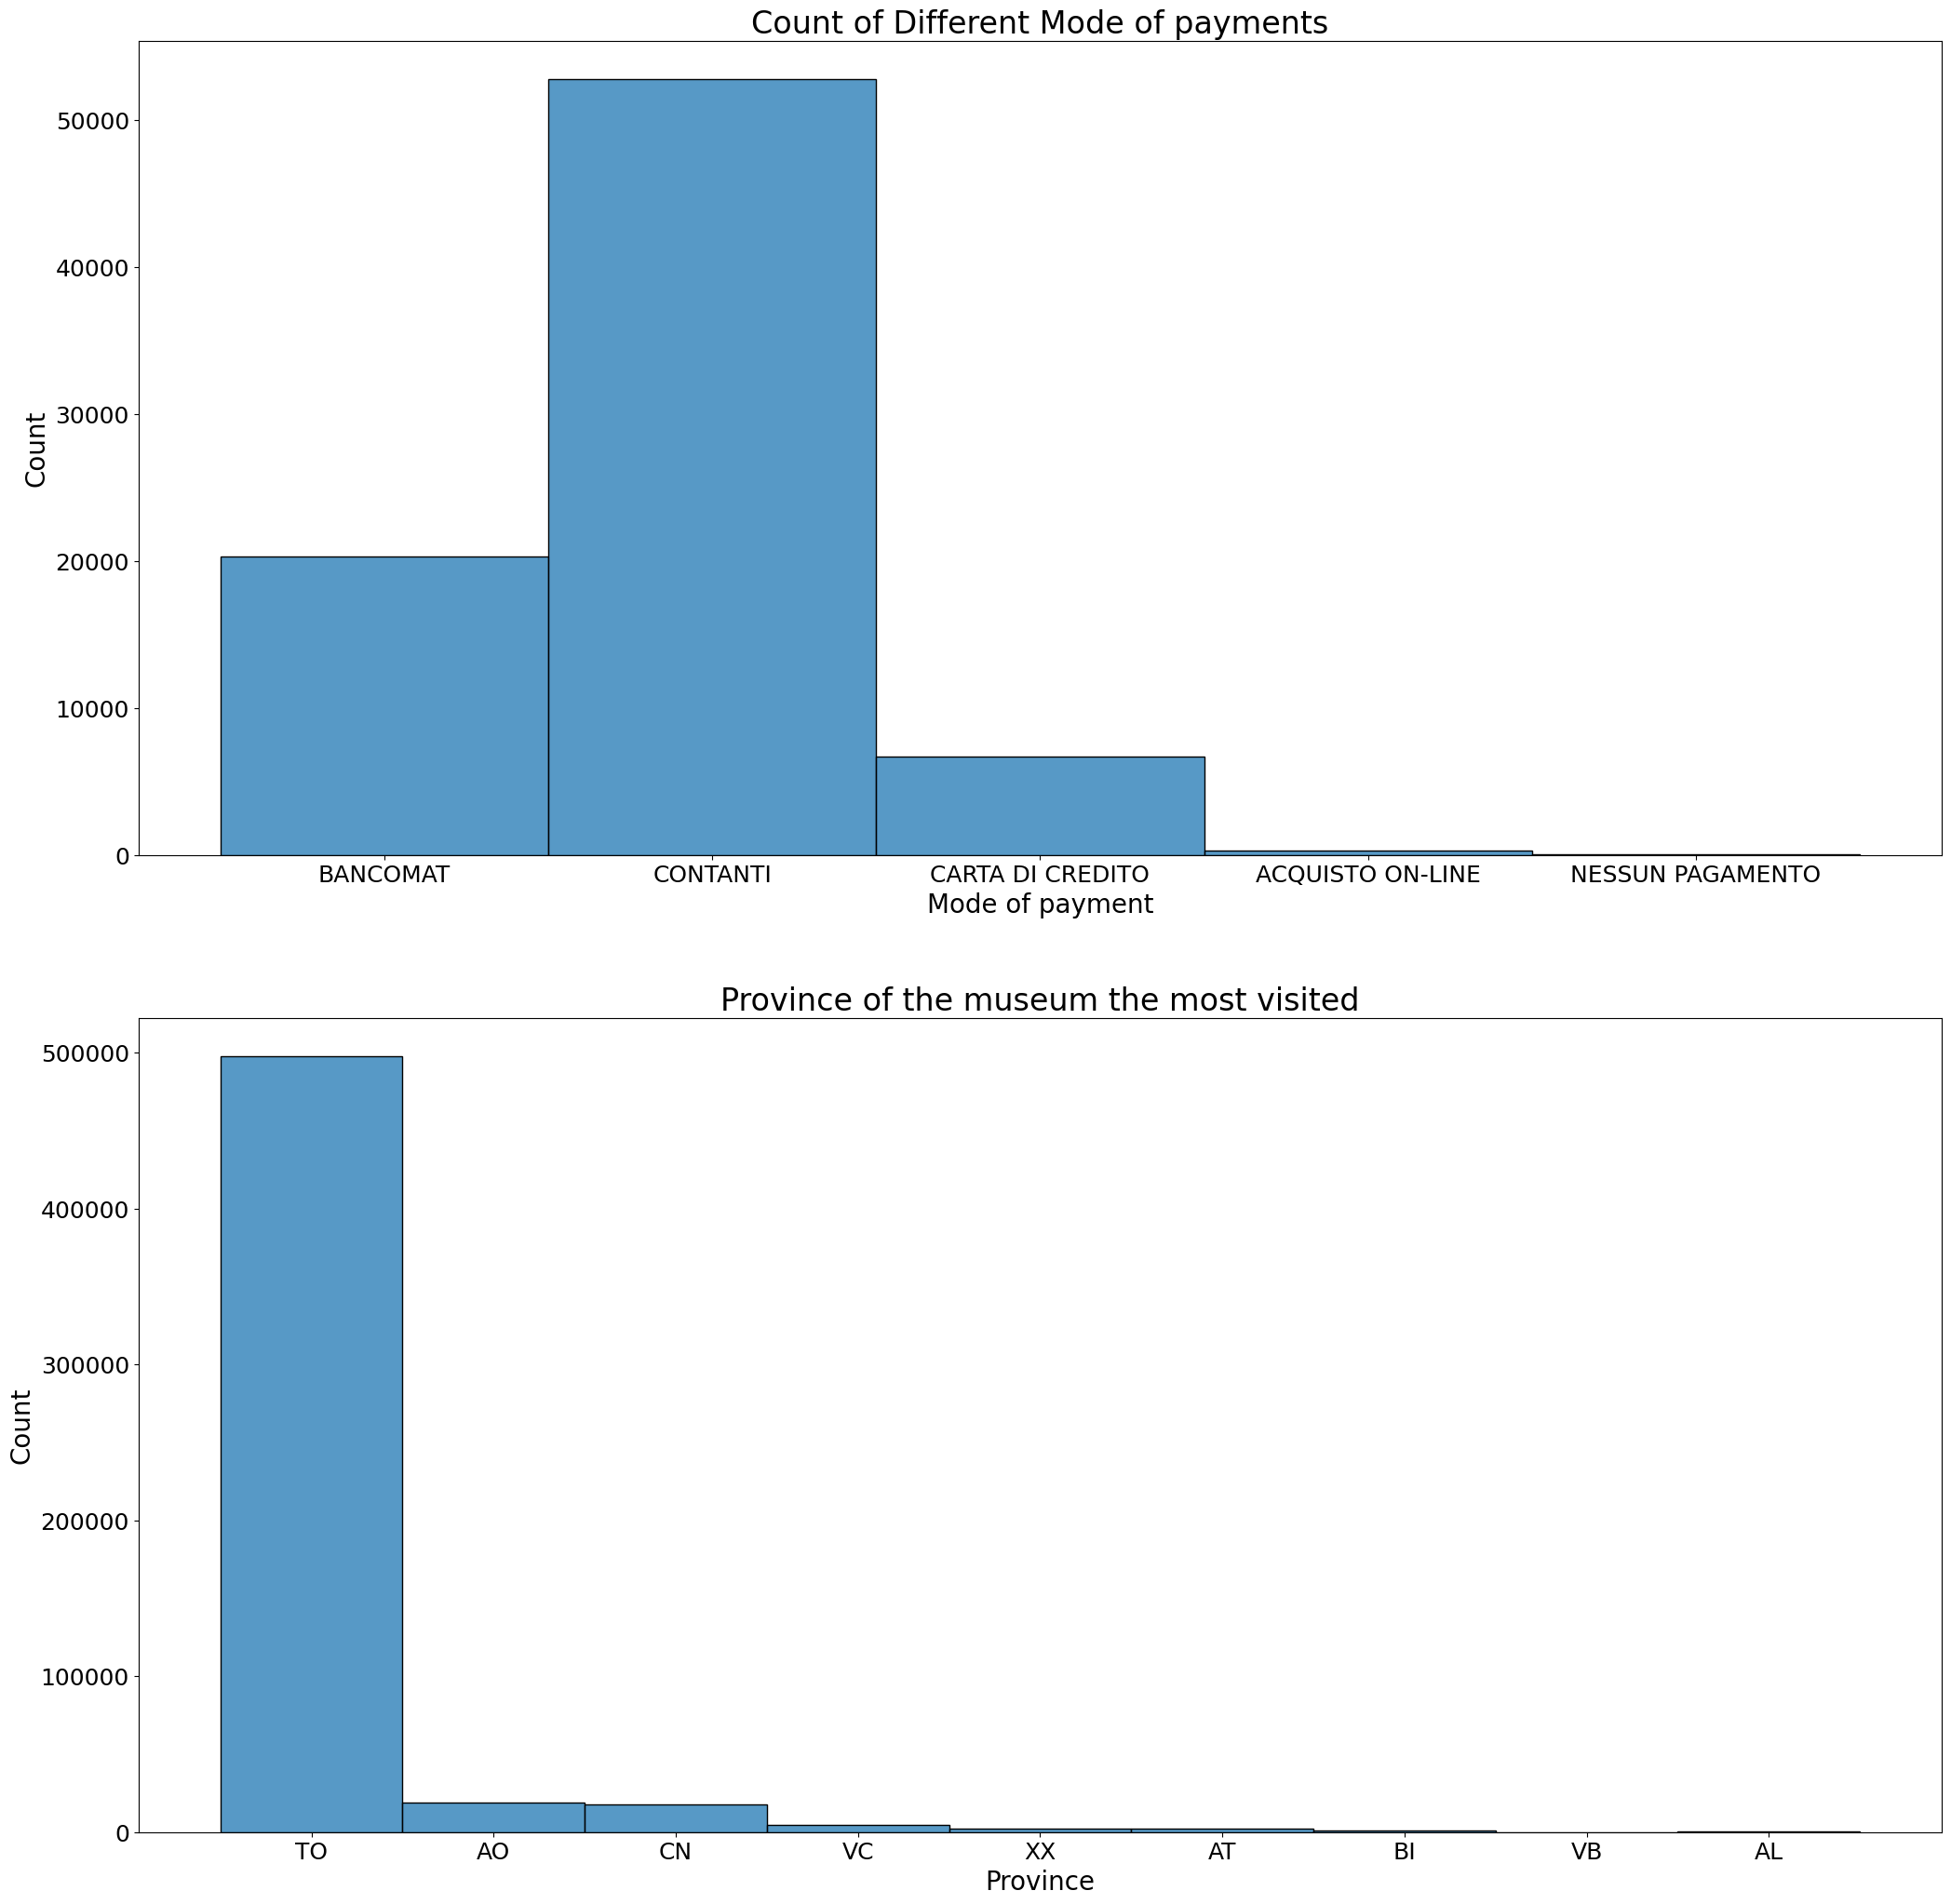

In [53]:
fig, ax = plt.subplots(2, 1,figsize=(25,25))

sns.histplot(df['mode of payment'],ax=ax[0])
ax[0].set_title("Count of Different Mode of payments", fontsize=24)
ax[0].tick_params(axis='both', labelsize=18)
ax[0].set_xlabel("Mode of payment", fontsize=20)
ax[0].set_ylabel("Count", fontsize=20)
sns.histplot(in1['province of museum'],ax=ax[1])
ax[1].set_title("Province of the museum the most visited", fontsize=24)
ax[1].tick_params(axis='both', labelsize=18)
ax[1].set_xlabel("Province", fontsize=20)
ax[1].set_ylabel("Count", fontsize=20)
plt.show()

[Text(0.5, 1.0, 'Distribution of age')]

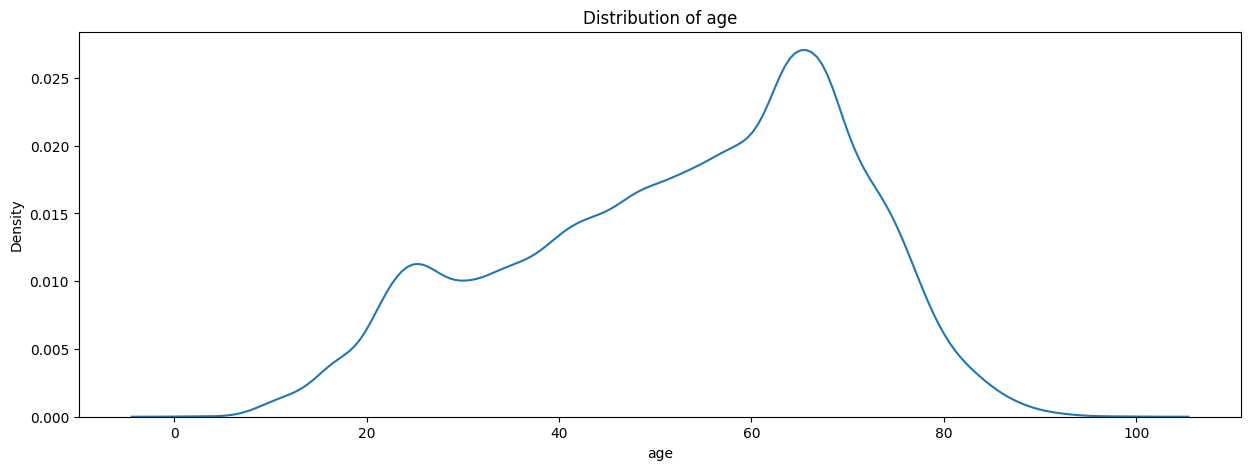

In [55]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(df['age'],hist=False,ax=ax).set(title="Distribution of age")

[Text(0.5, 1.0, 'Histogramme of price Paid')]

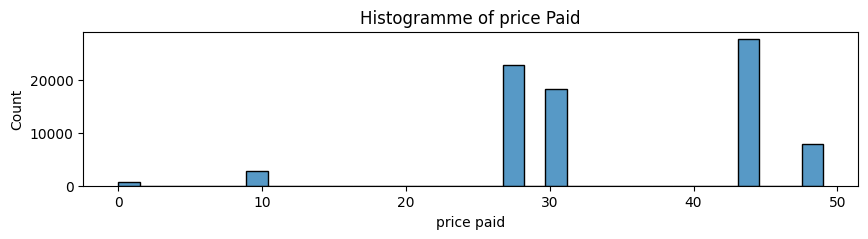

In [57]:
fig, ax = plt.subplots(figsize=(10,2))
sns.histplot(df['price paid'],binwidth=1.5,ax=ax).set(title="Histogramme of price Paid")

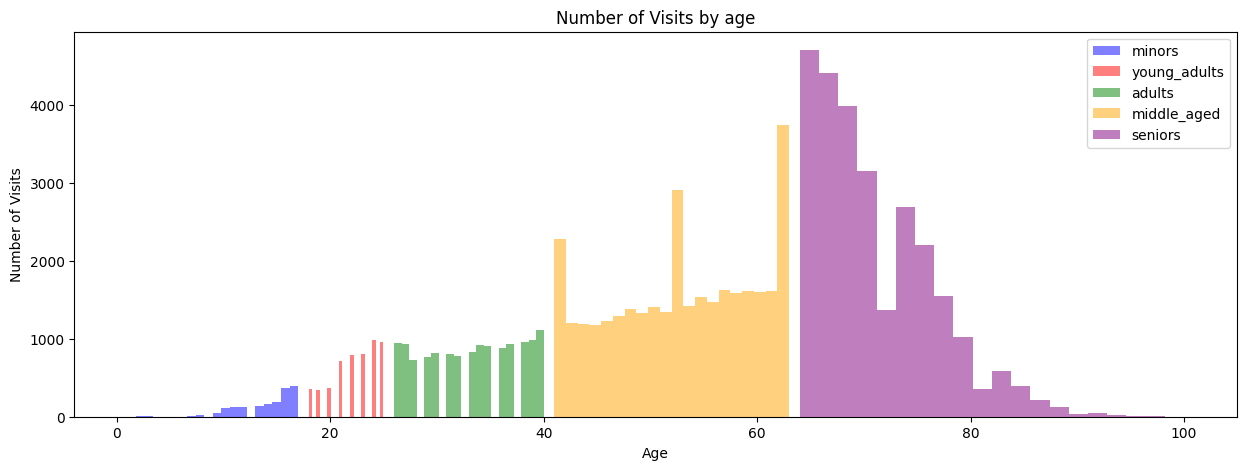

In [59]:
import matplotlib.pyplot as plt

# Sélectionner les colonnes "âge" et "nombre de visites"
age = df["age"]
n_visits = df["Number of visits"]

# Créer des listes pour chaque tranche d'âge
minors = age[(age >= 0) & (age <= 17)]
young_adults = age[(age > 17) & (age <= 25)]
adults = age[(age > 25) & (age <= 40)]
middle_aged = age[(age > 40) & (age <= 63)]
seniors = age[age > 63]

# Créer un histogramme pour chaque tranche d'âge en utilisant des couleurs différentes
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(minors, bins=20, color='blue', alpha=0.5, label='minors')
plt.hist(young_adults, bins=20, color='red', alpha=0.5, label='young_adults')
plt.hist(adults, bins=20, color='green', alpha=0.5, label='adults')
plt.hist(middle_aged, bins=20, color='orange', alpha=0.5, label='middle_aged')
plt.hist(seniors, bins=20, color='purple', alpha=0.5, label='seniors')
# Ajouter des étiquettes aux axes
plt.xlabel("Age")
plt.ylabel("Number of Visits")

# Ajouter un titre au graphique
plt.title("Number of Visits by age")

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


###  Seniors are the most customers to visit.

In [61]:
df["age_group"].unique()

['64+', '26-40', '41-63', '18-25', '0-17']
Categories (5, object): ['0-17' < '18-25' < '26-40' < '41-63' < '64+']

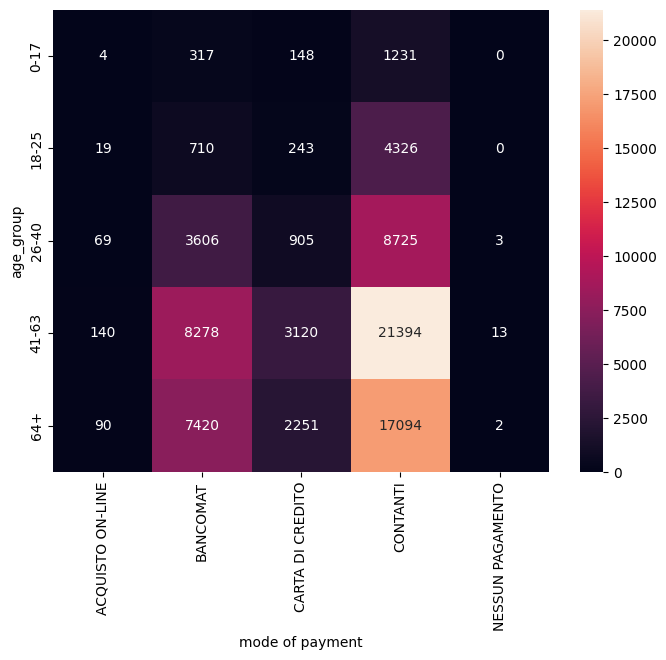

In [63]:
import seaborn as sns

# A cross-frequency table between "type of price discount" and "payment method"
# Heatmap based on the cross-frequency table
plt.figure(figsize=(8,6))
cross_table = pd.crosstab(df["age_group"], df["mode of payment"])
sns.heatmap(cross_table, annot=True, fmt="d")
plt.show()

In [65]:
df_percentages = df.groupby(['age_group', 'Churn']).size().groupby(level=0).apply(lambda x: x / x.sum() * 100)
round(df_percentages,2)

age_group  age_group  Churn
0-17       0-17       0        43.06
                      1        56.94
18-25      18-25      0        55.08
                      1        44.92
26-40      26-40      0        46.50
                      1        53.50
41-63      41-63      0        27.51
                      1        72.49
64+        64+        0        20.91
                      1        79.09
dtype: float64

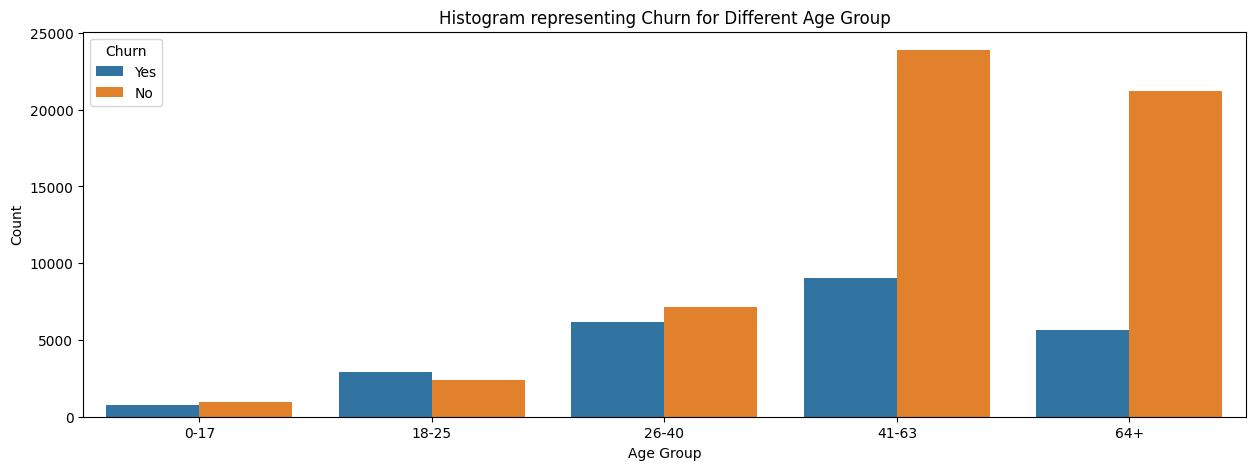

In [67]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,5))

sns.countplot(x='age_group', hue='Churn', data=df)
handles, labels = ax.get_legend_handles_labels()

new_labels = ['Yes' if label == '0' else 'No' for label in labels]

ax.legend(handles, new_labels, title="Churn")

plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Histogram representing Churn for Different Age Group")
plt.show()


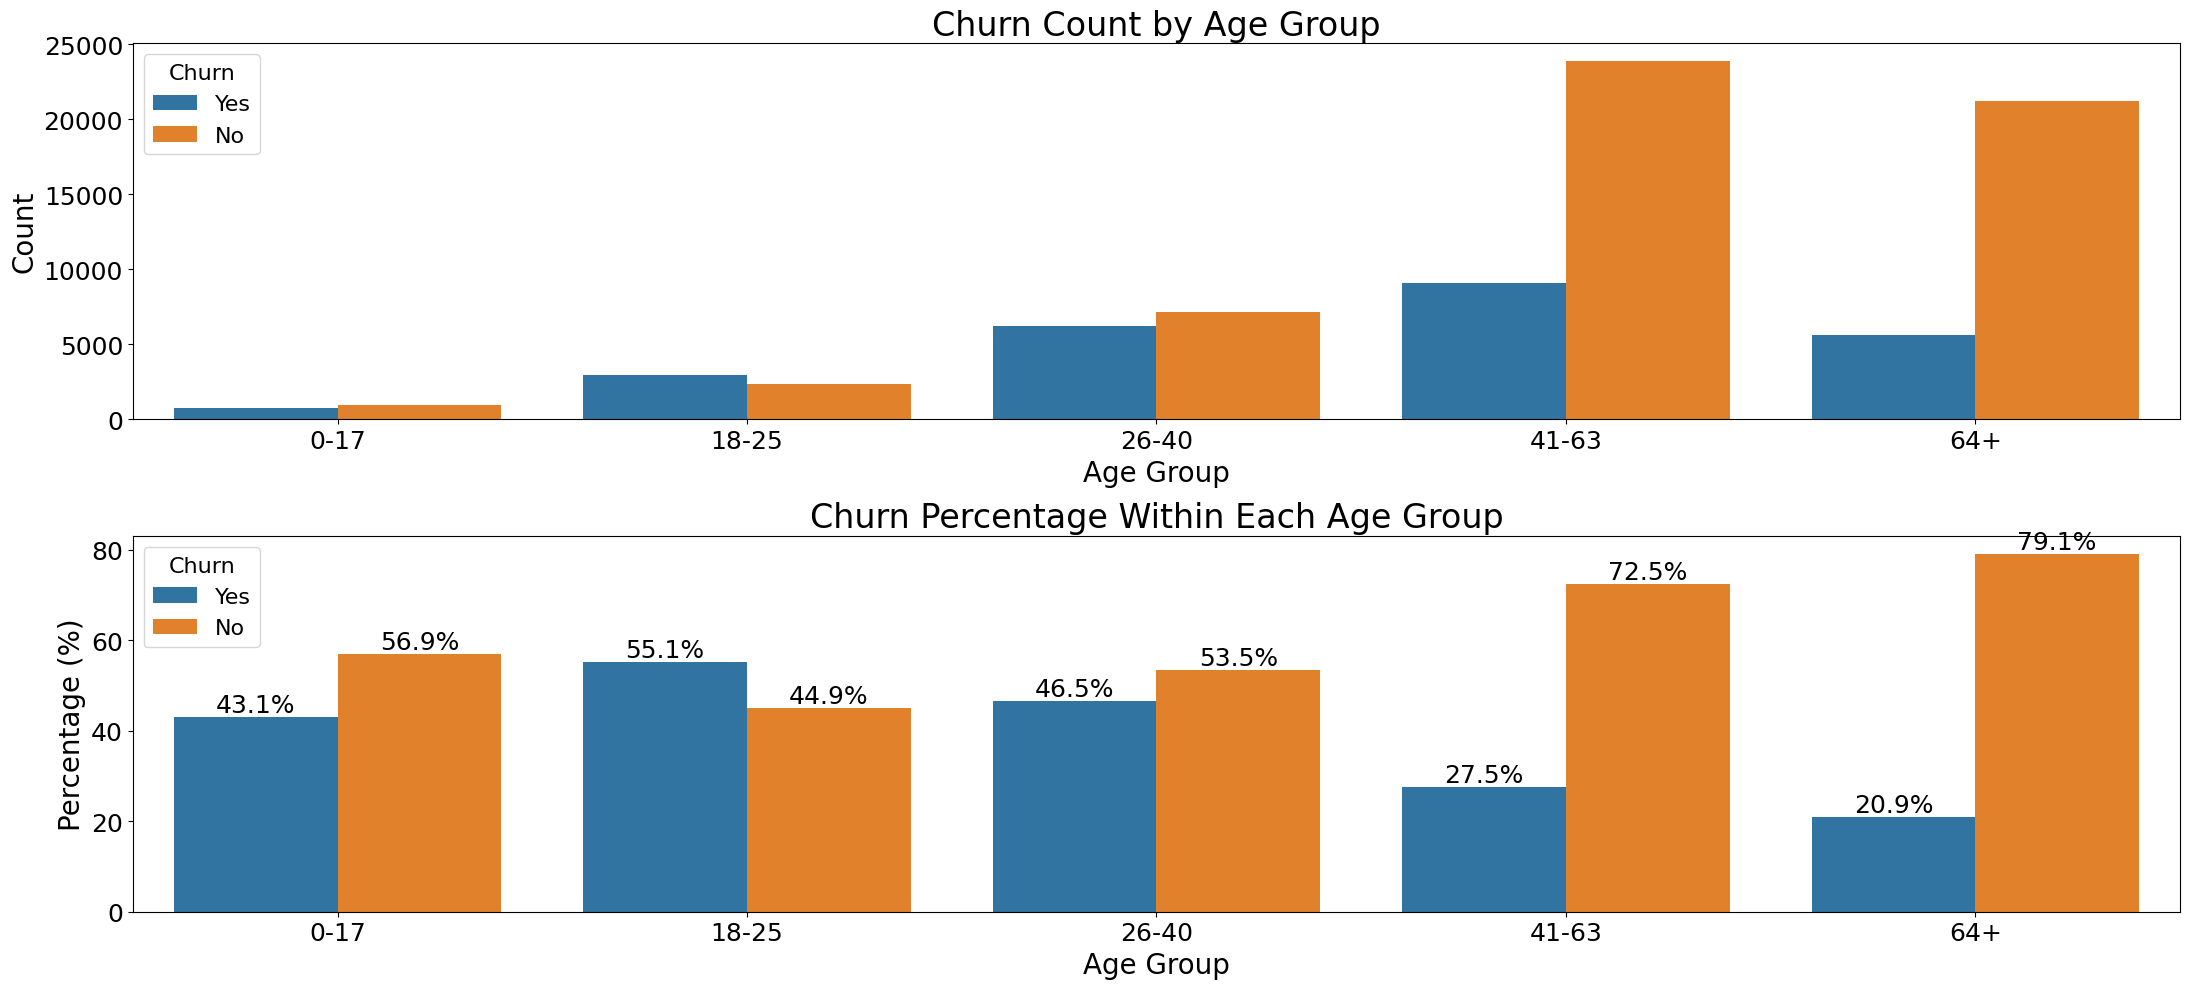

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Prepare percentage dataframe ---
df_pct = (
    df.groupby(['age_group', 'Churn'], as_index=False)
      .size()
)

df_pct['percentage'] = (
    df_pct.groupby('age_group')['size']
          .transform(lambda x: x / x.sum() * 100)
)
# --- Create figure with 2 columns ---
fig, axes = plt.subplots(2, 1, figsize=(22, 10))


sns.countplot(
    x='age_group',
    hue='Churn',
    data=df,
    ax=axes[0]
)

handles, labels = axes[0].get_legend_handles_labels()
new_labels = ['Yes' if label == '0' else 'No' for label in labels]
axes[0].legend(handles, new_labels, title="Churn", fontsize=16 , title_fontsize=16)

axes[0].set_title("Churn Count by Age Group" , fontsize=24)
axes[0].set_xlabel("Age Group", fontsize=20)
axes[0].set_ylabel("Count" , fontsize=20)
axes[0].tick_params(axis='both', labelsize=18)
axes[0].set_ylabel("Count", fontsize=20)


sns.barplot(
    data=df_pct,
    x='age_group',
    y='percentage',
    hue='Churn',
    ax=axes[1]
)

handles, labels = axes[1].get_legend_handles_labels()
new_labels = ['Yes' if label == '0' else 'No' for label in labels]
axes[1].legend(handles, new_labels, title="Churn" , fontsize=16 , title_fontsize=16)

axes[1].set_title("Churn Percentage Within Each Age Group" , fontsize=24)
axes[1].tick_params(axis='both', labelsize=18)
axes[1].set_xlabel("Age Group", fontsize=20)
axes[1].set_ylabel("Percentage (%)",fontsize=20)

# Add percentage labels
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', fontsize=18)

plt.tight_layout()
plt.show()


### The analysis highlights clear differences in churn behavior across age groups.
### While the absolute number of subscribers varies by age group, the percentage-based view provides a more meaningful comparison by normalizing within each group.

### In particular, young adults aged between 18 and 25 show a higher tendency to churn, with approximately 55% of subscribers in this age group cancelling their museum subscription. This suggests that younger visitors may be less loyal or more sensitive to factors such as pricing, content relevance, or competing leisure activities.

### Overall, these results indicate that age is an important factor influencing churn, and targeted retention strategies—especially for younger adults—could help reduce subscription cancellations.

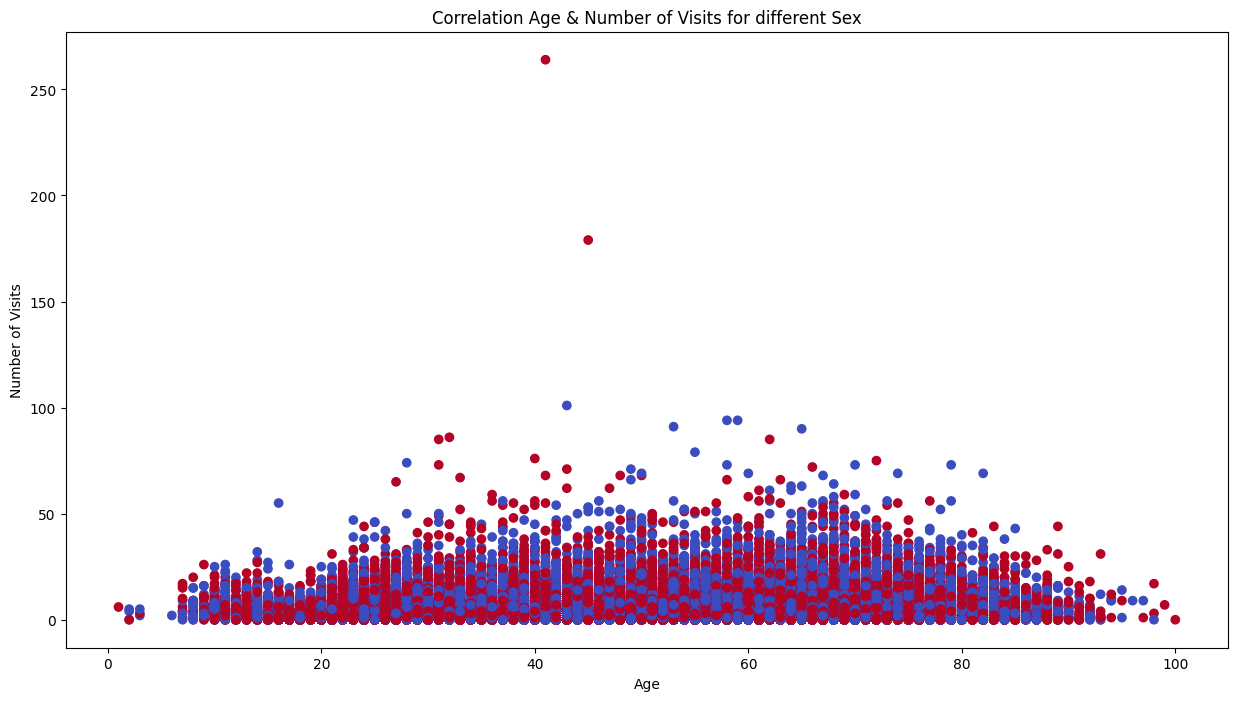

In [71]:
## Correlation between Age and Number of visits
fig, ax = plt.subplots(figsize=(15,8))

plt.scatter(df["age"], df["Number of visits"], c=df["Sex"], cmap=plt.cm.get_cmap("coolwarm", 2))
plt.xlabel("Age")
plt.ylabel("Number of Visits")
plt.title("Correlation Age & Number of Visits for different Sex")
plt.show()

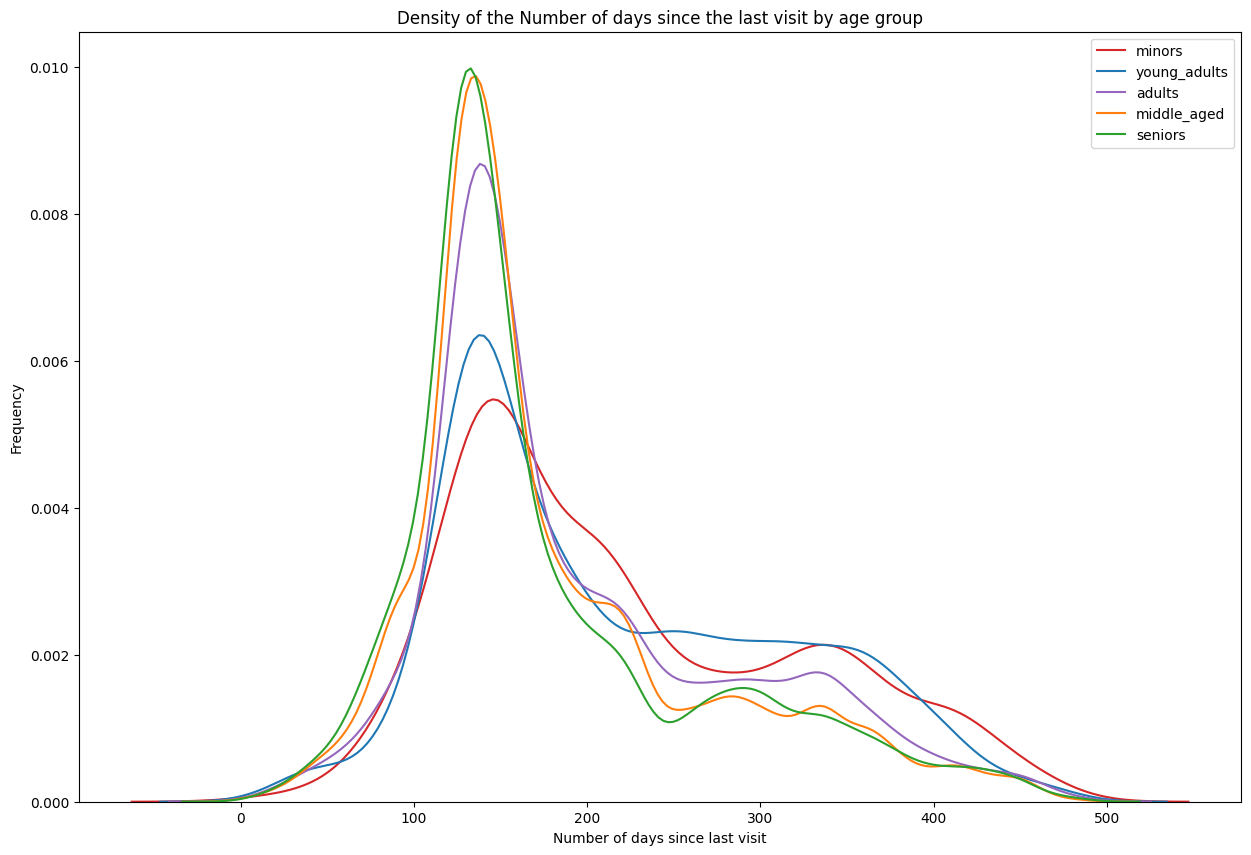

In [72]:
## Correlation between Age and Number of days since last visit by age group
color_pal=sns.color_palette()

# Same proportion for all 

df_minors = df[df["age_group"] == "0-17"]
df_youngs = df[df["age_group"] == "18-25"]
df_twenties = df[df["age_group"] == "26-40"]
df_fourties = df[df["age_group"] == "41-63"]
df_seniors = df[df["age_group"] == "64+"]

fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(df_minors["Number of days since last visit"],color=color_pal[3],hist=False, label='minors')
sns.distplot(df_youngs["Number of days since last visit"],color=color_pal[0],hist=False, label='young_adults')
sns.distplot(df_twenties["Number of days since last visit"], color=color_pal[4],hist=False, label='adults')
sns.distplot(df_fourties["Number of days since last visit"],color=color_pal[1],hist=False, label='middle_aged')
#plt.hist(df_seniors["Number of days since last visit"], bins=20, color='purple', alpha=0.5, label='seniors')
sns.distplot(df_seniors["Number of days since last visit"],color=color_pal[2],hist=False, label='seniors')


plt.xlabel("Number of days since last visit")
plt.ylabel("Frequency")


plt.title("Density of the Number of days since the last visit by age group")


plt.legend()


plt.show()


In [89]:
df[['Churn','price paid','age','Number of visits','Total of price not paid','Number of days since last visit']]

,Churn,price paid,age,Number of visits,Total of price not paid,Number of days since last visit
0,0,28,67,2,11.00,192.0
1,1,44,40,23,84.60,129.0
2,0,30,44,0,NaN,NaN
3,1,30,45,1,3.75,162.0
4,0,49,28,3,13.75,231.0
...,...,...,...,...,...,...
80103,1,44,60,11,48.85,142.0
80104,1,30,66,5,27.50,66.0
80105,0,44,43,2,10.00,309.0
80106,1,49,39,15,58.50,56.0


### Correlation matrix : 

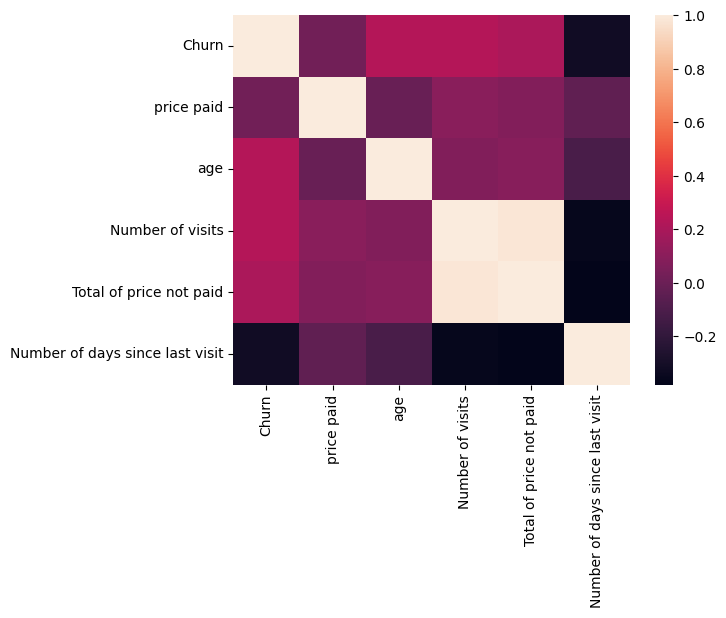

In [75]:
corr_matrix = df[['Churn','price paid','age','Number of visits','Total of price not paid','Number of days since last visit']].corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

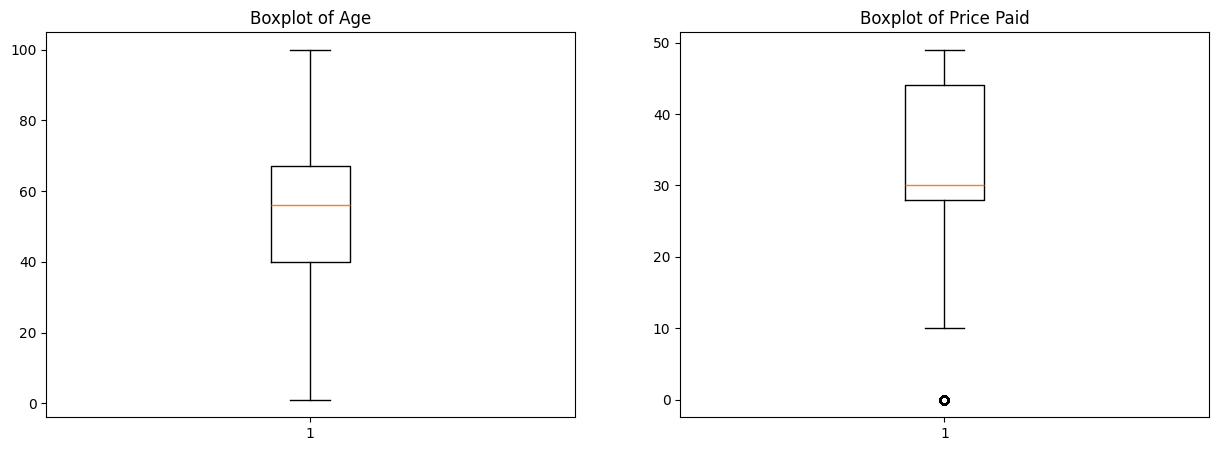

In [77]:
fig, ax = plt.subplots(1, 2,figsize=(15,5))
ax[0].boxplot(df['age'])
ax[0].set_title("Boxplot of Age")

ax[1].boxplot(df['price paid'])
ax[1].set_title("Boxplot of Price Paid")



plt.show()

id                                          0
Churn                                       0
Last Date of visit                       8088
Date of begining Card 2013                  0
Date of renew Card                      24532
Date of begining                            0
price paid                                  0
type of discount                            0
type of price reduction                     0
mode of payment                             0
name of the organisation                    0
place where consumer bought the card        0
Sex                                      2406
Profesion                               80108
comune                                      0
code postal                                 0
Existance of Card 2012                      0
age                                         0
Number of visits                            0
Total of price not paid                  8461
Number of days since last visit          8088
age_group                         

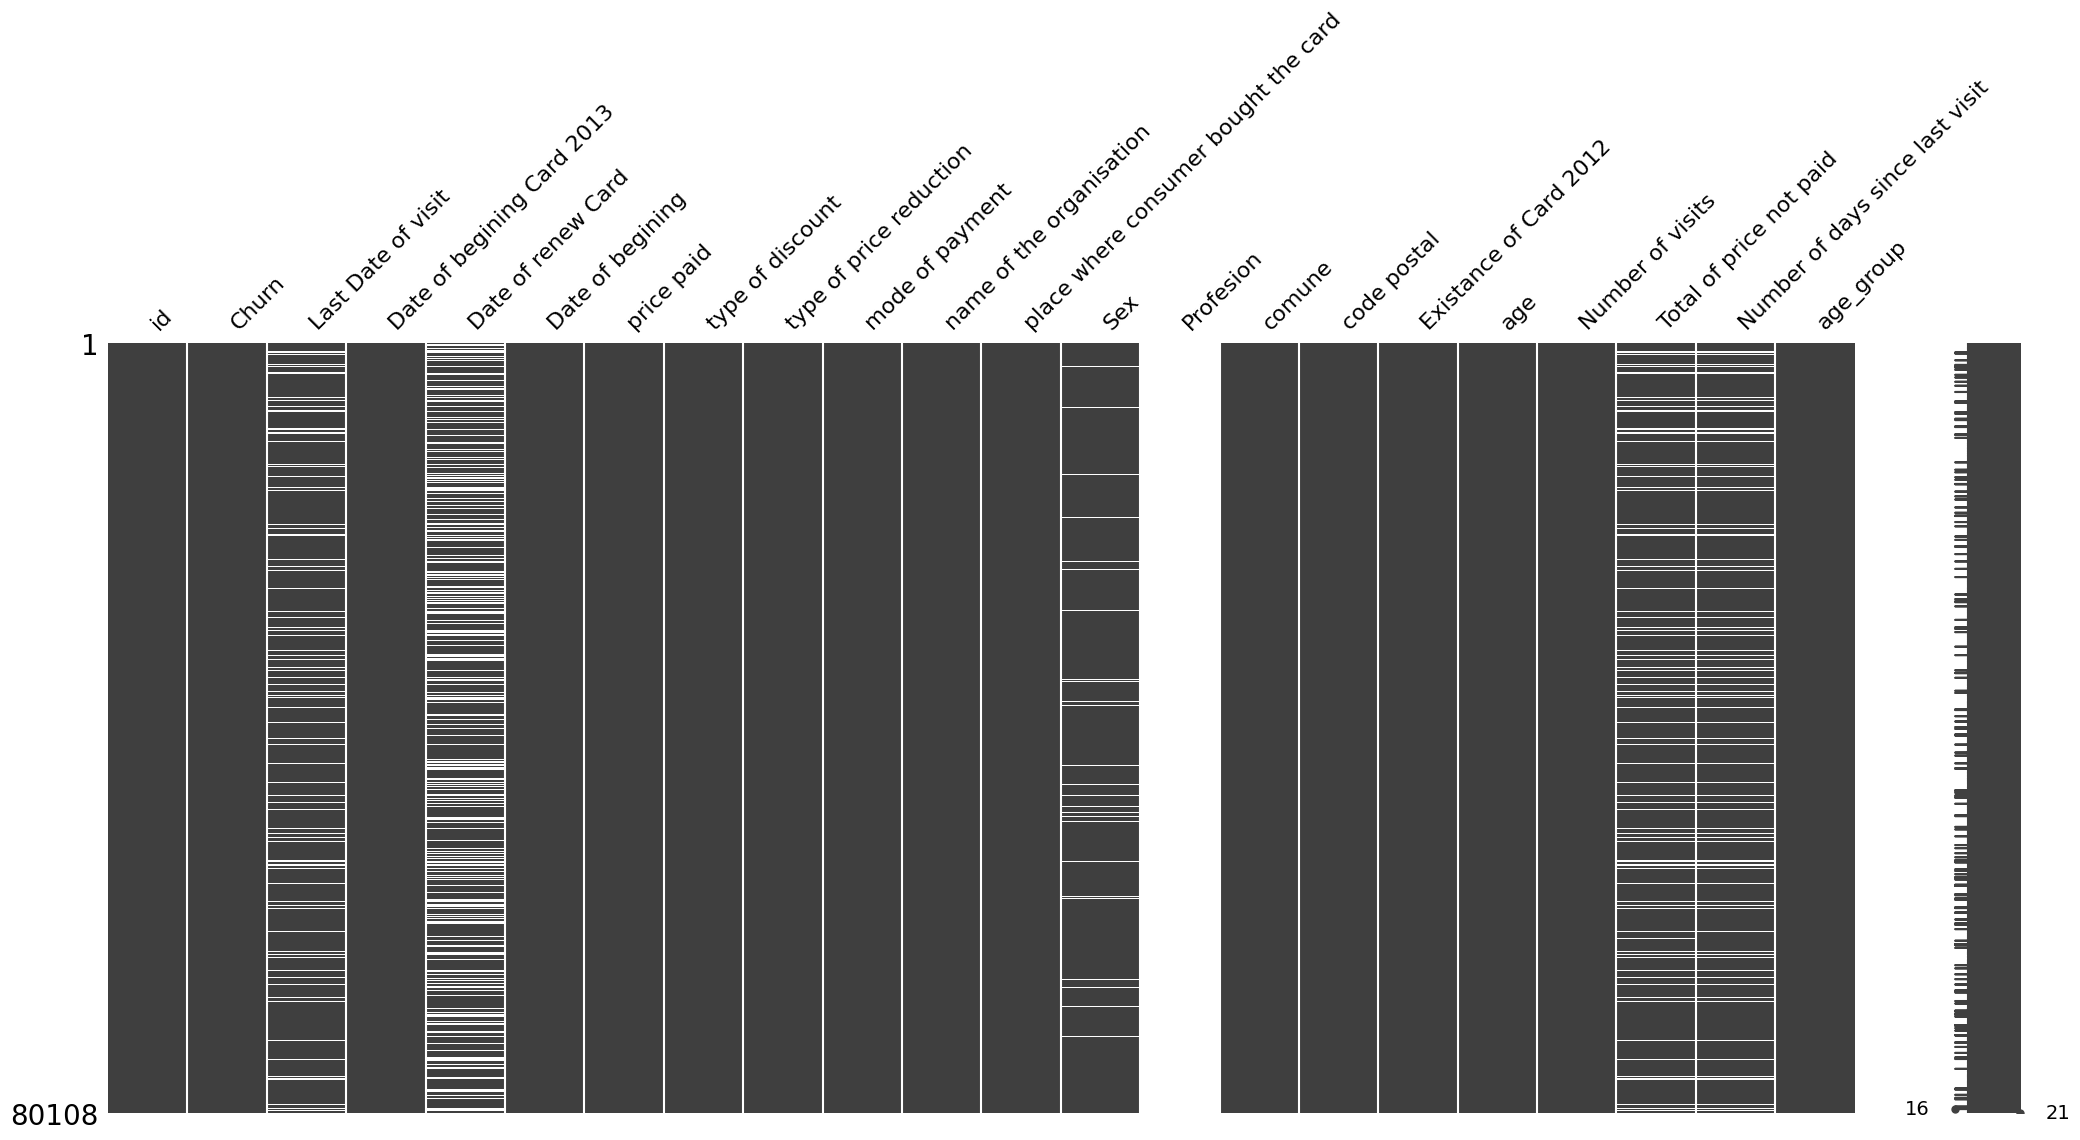

In [79]:
msno.matrix(df)
print(df.isna().sum())
df["Total of price not paid"]=df["Total of price not paid"].round().astype(pd.Int64Dtype())
df["Number of days since last visit"]=df["Number of days since last visit"].astype(pd.Int64Dtype())



In [81]:
#We drop Profesion
df=df.drop('Profesion',axis=1)

### We Want to Do a K-means Clustering and simply see The proportion of Churners in every Clusters
### We start by seeing what is the best number of clusters to choose depending on SSE(we choose 3)
### and then we verify the Proportion of Churners in every Cluster


,id,Churn,Last Date of visit,Date of begining Card 2013,Date of renew Card,Date of begining,price paid,type of discount,type of price reduction,mode of payment,...,place where consumer bought the card,Sex,comune,code postal,Existance of Card 2012,age,Number of visits,Total of price not paid,Number of days since last visit,age_group
0,100005,0,2013-09-19,2013-01-27,NaN,27/01/2013 00:00,28,RINNOVO ABBONAMENTO,ABBONAMENTO MUSEI RIDOTTO,BANCOMAT,...,PUNTO INFORMATIVO,1,GRUGLIASCO,10095,1,67,2,11,192,64+
1,100006,1,2013-11-21,2013-01-14,2014-01-09,14/01/2013 00:00,44,RINNOVO ABBONAMENTO,ABBONAMENTI MUSEI TORINO,CONTANTI,...,MUSEO,1,TORINO,10126,1,40,23,85,129,26-40
2,100007,0,NaT,2012-12-05,NaN,05/12/2012 00:00,30,GRUPPO D'ACQUISTO,ABBONAMENTO MUSEI RIDOTTO,CONTANTI,...,GRUPPO D'ACQUISTO,0,TORINO,10151,1,44,0,<NA>,<NA>,41-63
3,100017,1,2013-10-19,2012-12-10,2013-12-01,10/12/2012 00:00,30,NESSUNO SCONTO,OFFERTA SU QUANTITATIVO 30,CONTANTI,...,CRAL,1,TORINO,10146,1,45,1,4,162,41-63
4,100020,0,2013-08-11,2012-12-09,NaN,09/12/2012 00:00,49,NESSUNO SCONTO,ABBONAMENTI MUSEI TORINO,CARTA DI CREDITO,...,MUSEO,0,MILANO,20149,1,28,3,14,231,26-40


In [109]:
from sklearn.cluster import KMeans

k_rng=range(1,10)
df_clus=df[['Churn',"age","price paid","Number of visits","Sex"]]
df_clus=df_clus.dropna()
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df_clus[['age',"price paid","Number of visits","Sex"]])
    sse.append(km.inertia_)

print(sse)

[34122137.14349703, 17534969.127111897, 11376226.53008757, 8617239.145446045, 7684431.243562669, 6346371.907021797, 5785508.158822457, 5078797.797947015, 4612937.683555874]


In [111]:
df_clus.shape

(77702, 5)

So 3 is the best number of Clusters to use Based on the Elbow Technique 


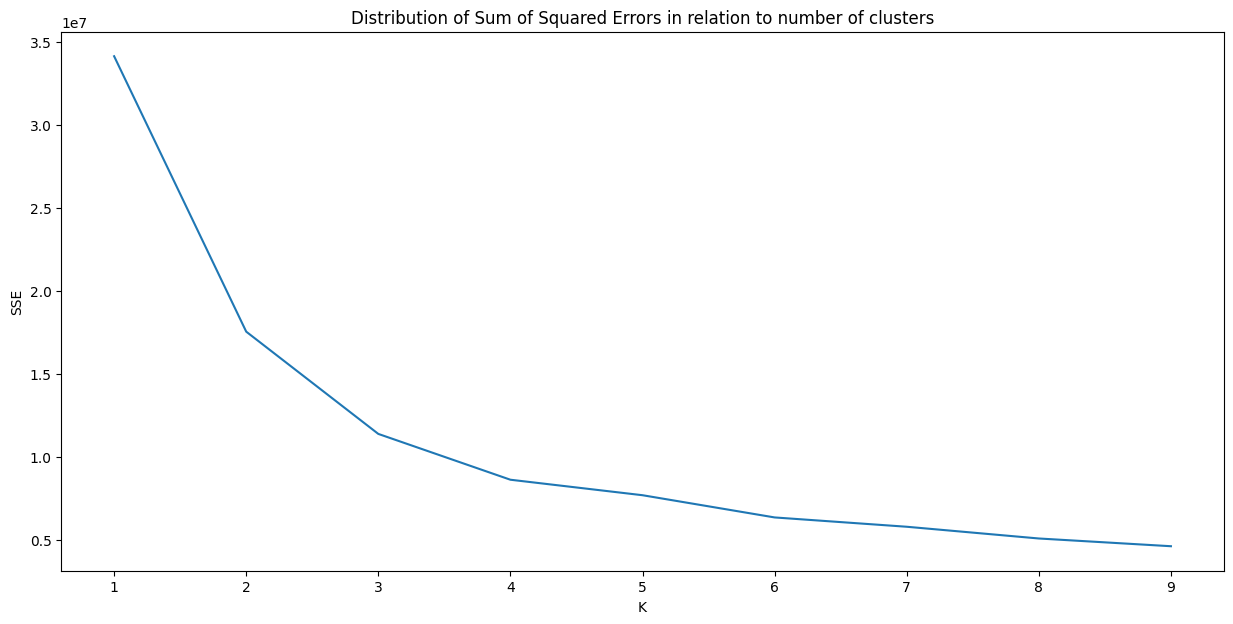

In [113]:
plt.subplots(figsize=(15,7))
plt.xlabel('K')
plt.ylabel('SSE')
plt.title("Distribution of Sum of Squared Errors in relation to number of clusters")
plt.plot(k_rng,sse)
print('So 3 is the best number of Clusters to use Based on the Elbow Technique ')

In [115]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km
y_pred=km.fit_predict(df_clus[['age','price paid',"Number of visits","Sex"]])
df_clus['cluster']=y_pred
df1=df_clus[df_clus.cluster==0]
df2=df_clus[df_clus.cluster==1]
df3=df_clus[df_clus.cluster==2]

df_clus[['Churn','cluster']].groupby(['cluster','Churn'])['Churn'].count()
#df.groupby('GROUP')['CUSTOMER_ACCOUNT_ID'].nunique().reset_index()


cluster  Churn
0        0        11009
         1        26779
1        0         7410
         1         7588
2        0         5274
         1        19642
Name: Churn, dtype: int64

In [117]:
tabb=df_clus[['Churn','cluster']].groupby(['cluster','Churn'])['Churn'].count()
df_clus

,Churn,age,price paid,Number of visits,Sex,cluster
0,0,67,28,2,1,2
1,1,40,44,23,1,0
2,0,44,30,0,0,0
3,1,45,30,1,1,0
4,0,28,49,3,0,1
...,...,...,...,...,...,...
80103,1,60,44,11,1,0
80104,1,66,30,5,1,2
80105,0,43,44,2,0,0
80106,1,39,49,15,1,0


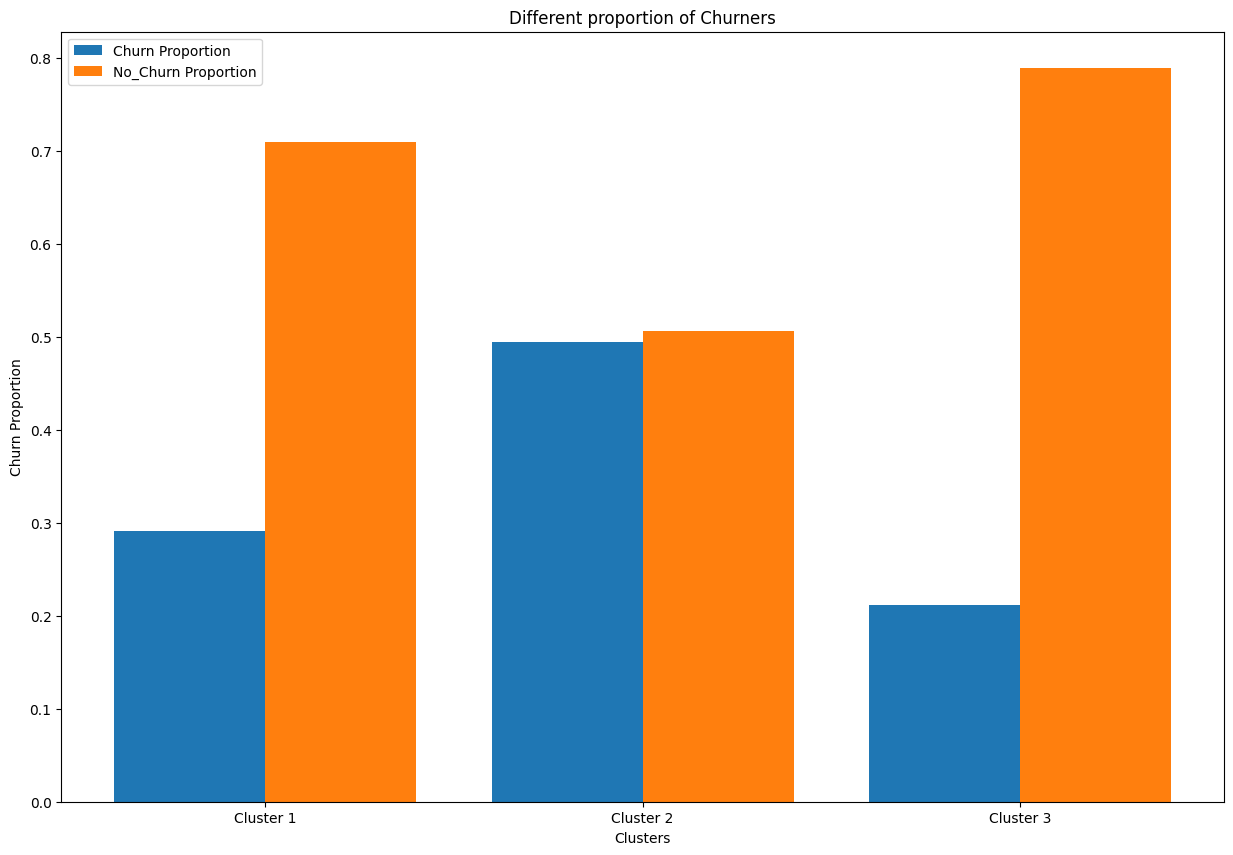

In [119]:
import numpy as np 
import matplotlib.pyplot as plt 

  
X = ['Cluster 1','Cluster 2','Cluster 3']
Churn = tabb.values[[0,2,4]]
No_Churn = tabb.values[[1,3,5]]
Churn_prop=[Churn[0]/tabb[0].sum(),Churn[1]/tabb[1].sum(),Churn[2]/tabb[2].sum()]
No_Churn_prop = [1-Churn_prop[0],1-Churn_prop[1],1-Churn_prop[2]]


  
X_axis = np.arange(len(X))

plt.subplots(figsize=(15,10))
  
plt.bar(X_axis - 0.2, Churn_prop, 0.4, label = 'Churn Proportion')
plt.bar(X_axis + 0.2, No_Churn_prop, 0.4, label = 'No_Churn Proportion')
  
plt.xticks(X_axis, X)
plt.xlabel("Clusters")
plt.ylabel("Churn Proportion")
plt.title("Different proportion of Churners")
plt.legend()
plt.show()


## We notice that any Client that belongs to Cluster 2 have statistically a higher chance to Churn since Cluster 2 has the highest Churn rate

In [223]:
df[['Churn','Sex']].groupby(['Churn','Sex'])['Sex'].count()

Churn  Sex
0      0      11294
       1      13239
1      0      24921
       1      30684
Name: Sex, dtype: int64

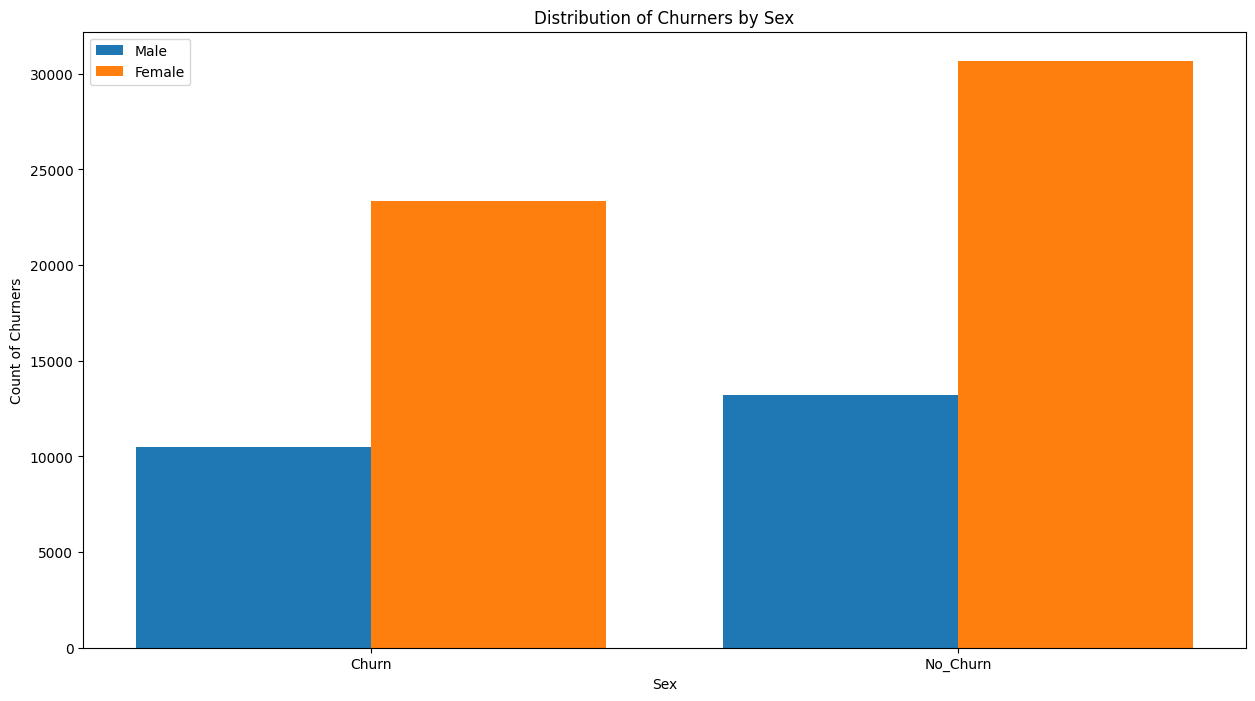

In [127]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Churn','No_Churn']
Churn = [10462,13231]
No_Churn = [23336,30673]
  
X_axis = np.arange(len(X))
plt.subplots(figsize=(15,8))
  
plt.bar(X_axis - 0.2, Churn, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, No_Churn, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.xlabel("Sex")
plt.ylabel("Count of Churners")
plt.title("Distribution of Churners by Sex")
plt.legend()
plt.show()


## Training Machine Learning classification Models

In [134]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import seaborn as sns

df1=df

# Supprimer les lignes contenant des valeurs manquantes
df1["Sex"].fillna(random.choice([0,1]), inplace=True)

# Séparer les données en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df1[['Sex', 'price paid', 'age', 'Number of visits']], 
                                                    df1['Churn'], test_size=0.2)

# Entraîner un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Afficher les performances du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7181999750343278


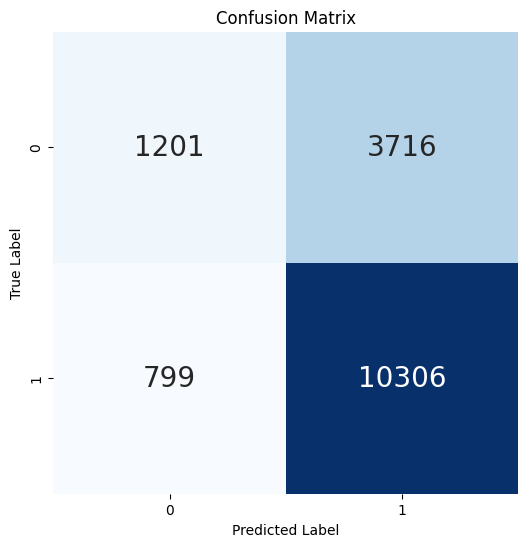

In [140]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))

#Create a heatmap of the confusion matrix data

sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
            fmt='d', annot_kws={"size": 20},ax=ax)

#Add labels and titles
ax.set_title('Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

plt.show()


In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Séparer les données en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df1[['Sex', 'price paid', 'age', 'Number of visits']], 
                                                    df1['Churn'], test_size=0.2)

# Entraîner un modèle de régression logistique
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Entraîner un modèle de arbre de décision
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Entraîner un modèle de forêt aléatoire
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Faire des prédictions sur les données de test pour chaque modèle
y_pred_logistic = logistic_model.predict(X_test)

y_pred_decision_tree = decision_tree_model.predict

## Since we want to predict a binary variable We chose 3 different classification machine learning models :
## logistic Regression, Decision Tree and Random Forest 
## We split the Data into Train and test set and we run different models and we predict the different probability for every model

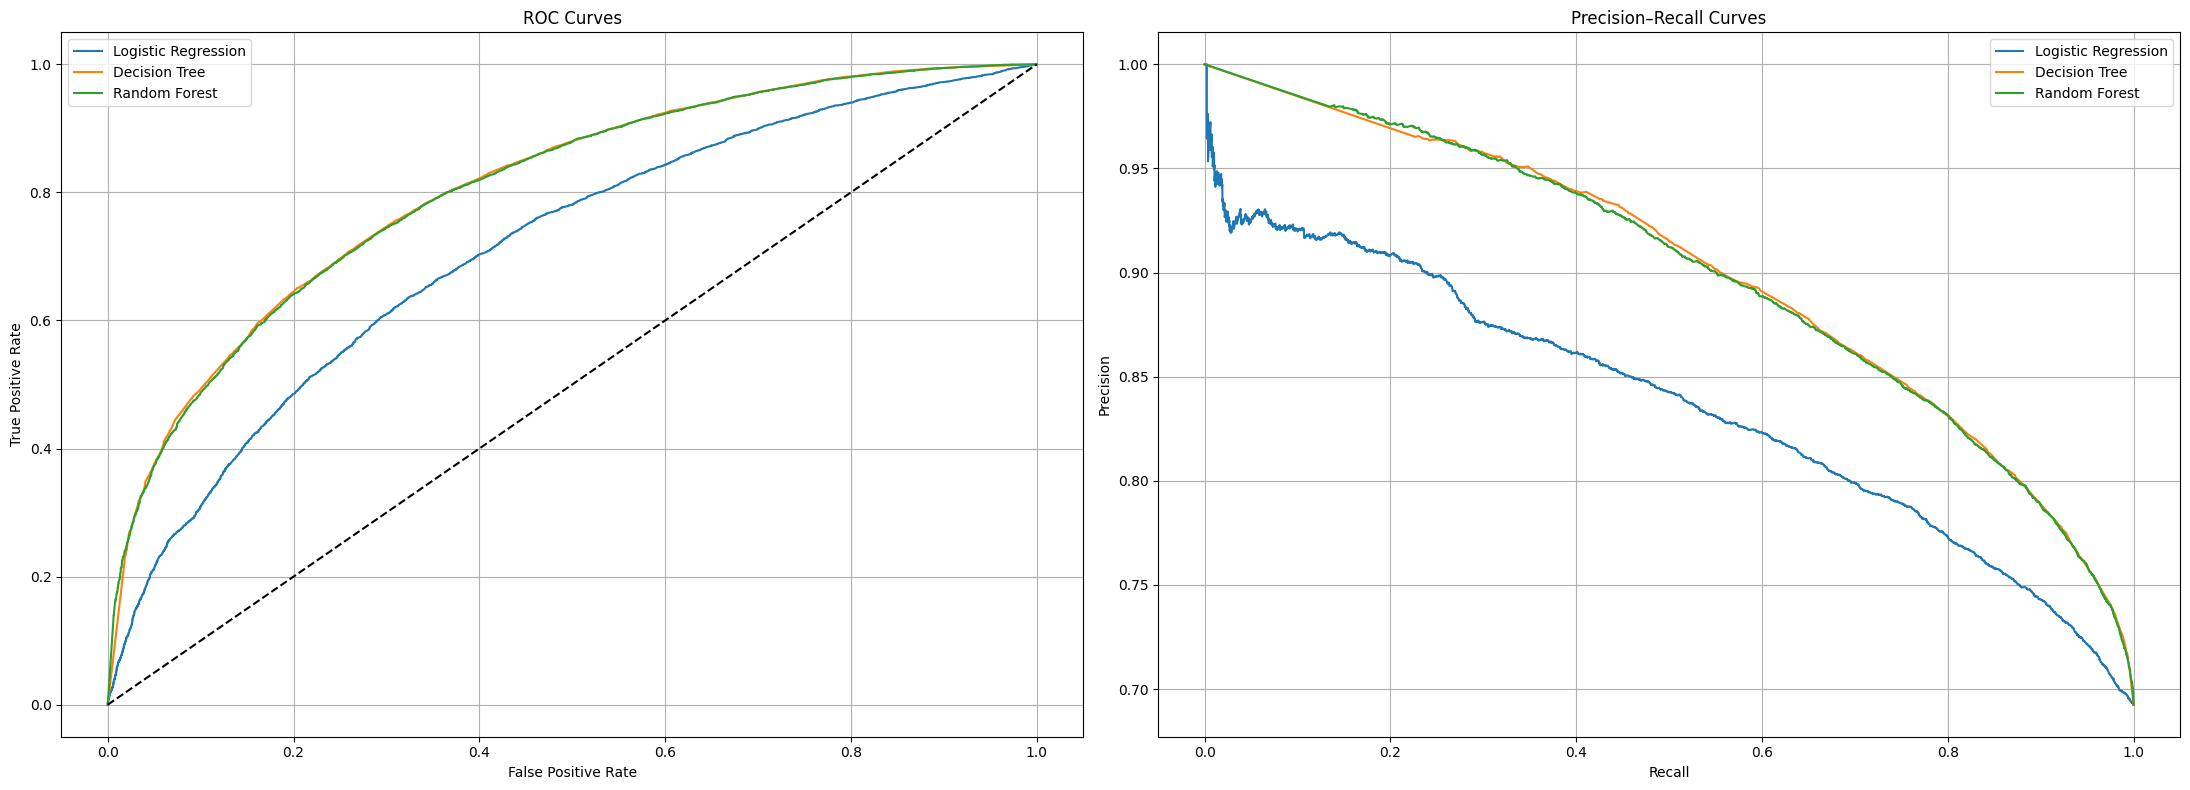

In [160]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# --- ROC Curves ---
fpr_log, tpr_log, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# --- Precision-Recall Curves ---
prec_log, rec_log, _ = precision_recall_curve(
    y_test, logistic_model.predict_proba(X_test)[:, 1]
)
prec_dt, rec_dt, _ = precision_recall_curve(
    y_test, decision_tree_model.predict_proba(X_test)[:, 1]
)
prec_rf, rec_rf, _ = precision_recall_curve(
    y_test, random_forest_model.predict_proba(X_test)[:, 1]
)

# --- Create figure with 2 subplots ---
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

# ===== Plot 1: ROC Curves =====
axes[0].plot(fpr_log, tpr_log, label='Logistic Regression')
axes[0].plot(fpr_dt, tpr_dt, label='Decision Tree')
axes[0].plot(fpr_rf, tpr_rf, label='Random Forest')
axes[0].plot([0, 1], [0, 1], 'k--')

axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curves')
axes[0].legend()
axes[0].grid(True)

# ===== Plot 2: Precision-Recall Curves =====
axes[1].plot(rec_log, prec_log, label='Logistic Regression')
axes[1].plot(rec_dt, prec_dt, label='Decision Tree')
axes[1].plot(rec_rf, prec_rf, label='Random Forest')

axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision–Recall Curves')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


## Overall, the Logistic Regression model underperforms compared to the Decision Tree and Random Forest models, as indicated by both its lower ROC curve and its unstable Precision–Recall behavior. The tree-based models demonstrate more consistent and reliable performance, making them better suited for churn prediction in this context.

## Let's Consider a marketing campaign addressing directly single customers. We know that each contact costs 1 euro. We can also compute the consumer value for each single customer. We can reasonably assume that a churner, contacted for the campaign has a probability of 10% of not churning. Non-churners contacted are simply a cost of 1 euro.

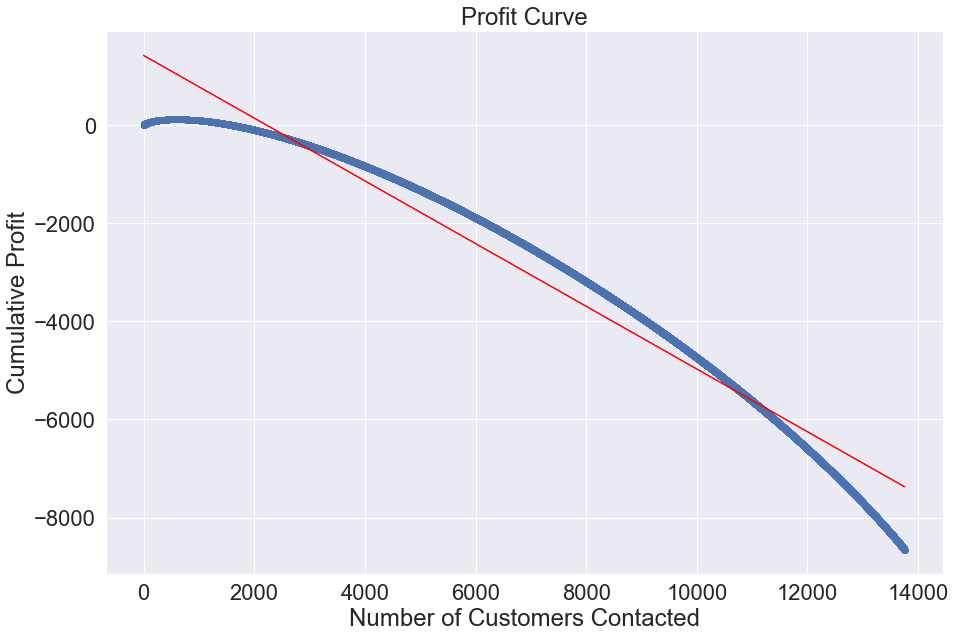

In [387]:
X_train, X_test, y_train, y_test = train_test_split(df[['Sex', 'price paid', 'age', 'Number of visits']], 
                                                    df['Churn'], test_size=0.2)
y_pred_proba = model.predict_proba(X_test)

# Compute expected profit for each customer
profit = y_pred_proba[:, 0] * -1 + y_pred_proba[:, 1] * 0.9-1 + y_pred_proba[:, 1]*0.1 * (X_test["Number of visits"] * 0.2 - 1)

# Order customers by predicted probability of churn
profit_sorted = profit.sort_values(ascending=False)

# Compute cumulative profit
cum_profit = np.cumsum(profit_sorted)


from sklearn.linear_model import LinearRegression

# Fit linear regression model to cumulative profit data
reg = LinearRegression().fit(np.array(range(len(cum_profit))).reshape(-1, 1), cum_profit)
fig, ax = plt.subplots(figsize=(15,10))

# Plot the profit curve
plt.scatter(range(len(cum_profit)), cum_profit)
plt.plot(range(len(cum_profit)), reg.predict(np.array(range(len(cum_profit))).reshape(-1, 1)), color='red')
plt.xlabel('Number of Customers Contacted')
plt.ylabel('Cumulative Profit')
plt.title('Profit Curve')
plt.show()

## Between 3000 and 11000 Clients contacted We are making a positive profit otherwise The company failed with the plan and it is just losing money